<a href="https://colab.research.google.com/github/Meera-Ajay-25/NLP-projects/blob/main/AirBnb_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NLP project: **Sentiment Analysis of AirBnb Reviews**

Steps:

1) Importing the necessary libraries.

2) Data Preprocessing.

3) Removing Special Characters.

4) Word Cloud creation.

5) Tokenization and Stemming.

6) Removing stop words.

7) Vectorization.

8) Model building and Evaluation.




In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df=pd.read_csv("/content/AirBNBReviews.csv")
df

,Genre,Review,Positive or Negative
0,Location,"The location of this Airbnb was perfect, close...",1.0
1,Cleanliness,"The cleanliness of the Airbnb was outstanding,...",1.0
2,Neighborhood,The neighborhood where this Airbnb is situated...,1.0
3,Security,I felt completely safe and secure during my st...,1.0
4,Pet Friendliness,"They were so welcoming to my pet, it felt like...",1.0
...,...,...,...
349,Host,"Unfortunately, the host was unresponsive and l...",0.0
350,Host,I experienced difficulties in reaching the hos...,0.0
351,Host,The host was unaccommodating and did not adequ...,0.0
352,Host,"I felt unwelcome by the host, with minimal com...",0.0


In [28]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Data Preprocessing**

In [29]:
#checking the data types of the dataset
df.dtypes

Genre                    object
Review                   object
Positive or Negative    float64
dtype: object

In [30]:
#checking the missing values
df.isna().sum()

Genre                   13
Review                  13
Positive or Negative    13
dtype: int64

In [31]:
#dropping the Genre
df.drop(['Genre'],axis=1,inplace=True)

In [32]:
df.dropna(axis=0,inplace=True)

In [33]:
df

,Review,Positive or Negative
0,"The location of this Airbnb was perfect, close...",1.0
1,"The cleanliness of the Airbnb was outstanding,...",1.0
2,The neighborhood where this Airbnb is situated...,1.0
3,I felt completely safe and secure during my st...,1.0
4,"They were so welcoming to my pet, it felt like...",1.0
...,...,...
349,"Unfortunately, the host was unresponsive and l...",0.0
350,I experienced difficulties in reaching the hos...,0.0
351,The host was unaccommodating and did not adequ...,0.0
352,"I felt unwelcome by the host, with minimal com...",0.0


In [34]:
df.rename(columns={'Positive or Negative':'Target'},inplace=True)

In [35]:
df

,Review,Target
0,"The location of this Airbnb was perfect, close...",1.0
1,"The cleanliness of the Airbnb was outstanding,...",1.0
2,The neighborhood where this Airbnb is situated...,1.0
3,I felt completely safe and secure during my st...,1.0
4,"They were so welcoming to my pet, it felt like...",1.0
...,...,...
349,"Unfortunately, the host was unresponsive and l...",0.0
350,I experienced difficulties in reaching the hos...,0.0
351,The host was unaccommodating and did not adequ...,0.0
352,"I felt unwelcome by the host, with minimal com...",0.0


In [36]:
df['Target'].unique()

array([1., 0.])

In [37]:
rev=df['Review']
rev

0      The location of this Airbnb was perfect, close...
1      The cleanliness of the Airbnb was outstanding,...
2      The neighborhood where this Airbnb is situated...
3      I felt completely safe and secure during my st...
4      They were so welcoming to my pet, it felt like...
                             ...                        
349    Unfortunately, the host was unresponsive and l...
350    I experienced difficulties in reaching the hos...
351    The host was unaccommodating and did not adequ...
352    I felt unwelcome by the host, with minimal com...
353    The host was unhelpful and showed a lack of in...
Name: Review, Length: 341, dtype: object

**Removing Special Characters**

In [38]:
rev=rev.str.replace('[^a-zA-Z0-9]+'," ")
rev

<ipython-input-38-218c1edb1502>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rev=rev.str.replace('[^a-zA-Z0-9]+'," ")


0      The location of this Airbnb was perfect close ...
1      The cleanliness of the Airbnb was outstanding ...
2      The neighborhood where this Airbnb is situated...
3      I felt completely safe and secure during my st...
4      They were so welcoming to my pet it felt like ...
                             ...                        
349    Unfortunately the host was unresponsive and la...
350    I experienced difficulties in reaching the hos...
351    The host was unaccommodating and did not adequ...
352    I felt unwelcome by the host with minimal comm...
353    The host was unhelpful and showed a lack of in...
Name: Review, Length: 341, dtype: object

**Word Cloud**

In [39]:
text_corpus=' '.join(df['Review'].values)

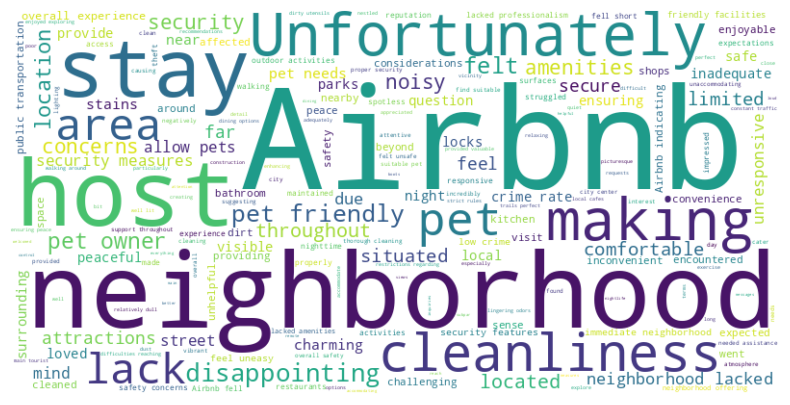

In [40]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Tokenization and Stemming**

In [43]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps=PorterStemmer()
rev=rev.apply(lambda x:[ps.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda y: " ".join(y))
rev

0      the locat of thi airbnb wa perfect close to al...
1      the cleanli of the airbnb wa outstand everyth ...
2      the neighborhood where thi airbnb is situat wa...
3      i felt complet safe and secur dure my stay at ...
4      they were so welcom to my pet it felt like a h...
                             ...                        
349    unfortun the host wa unrespons and lack the ne...
350    i experienc difficulti in reach the host when ...
351    the host wa unaccommod and did not adequ addre...
352    i felt unwelcom by the host with minim commun ...
353    the host wa unhelp and show a lack of interest...
Name: Review, Length: 341, dtype: object

**Removing stopwords**

In [44]:
from nltk.corpus import stopwords
st=stopwords.words('english')
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if i.lower() not in st]).apply(lambda y: " ".join(y))
rev

0      locat thi airbnb wa perfect close popular attract
1         cleanli airbnb wa outstand everyth wa spotless
2      neighborhood thi airbnb situat wa vibrant full...
3           felt complet safe secur dure stay thi airbnb
4                    welcom pet felt like home away home
                             ...                        
349    unfortun host wa unrespons lack necessari prof...
350    experienc difficulti reach host need assist qu...
351    host wa unaccommod adequ address concern wa di...
352    felt unwelcom host minim commun lack support t...
353    host wa unhelp show lack interest ensur comfor...
Name: Review, Length: 341, dtype: object

In [45]:
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if len(i)>2]).apply(lambda y: " ".join(y))
rev

0         locat thi airbnb perfect close popular attract
1               cleanli airbnb outstand everyth spotless
2       neighborhood thi airbnb situat vibrant full life
3           felt complet safe secur dure stay thi airbnb
4                    welcom pet felt like home away home
                             ...                        
349    unfortun host unrespons lack necessari profess...
350    experienc difficulti reach host need assist qu...
351     host unaccommod adequ address concern disappoint
352    felt unwelcom host minim commun lack support t...
353    host unhelp show lack interest ensur comfort e...
Name: Review, Length: 341, dtype: object

**Vectorization**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(rev)
print(data_vec)

  (0, 21)	0.3803000431608566
  (0, 285)	0.5109010161138954
  (0, 52)	0.4654037529722925
  (0, 272)	0.4130518674755935
  (0, 7)	0.14476137620829918
  (0, 377)	0.31520271883729173
  (0, 219)	0.29467086791152014
  (1, 352)	0.47820146781031697
  (1, 122)	0.5329395600220923
  (1, 264)	0.6007388521503565
  (1, 51)	0.31802088882461693
  (1, 7)	0.15897901539445336
  (2, 208)	0.5221369639118945
  (2, 151)	0.5221369639118945
  (2, 421)	0.4287378254465316
  (2, 344)	0.3567043237280584
  (2, 248)	0.18460037524754713
  (2, 7)	0.13817787900121745
  (2, 377)	0.30086784393154375
  (3, 355)	0.2771650269648324
  (3, 102)	0.33329356949899
  (3, 335)	0.2810896792058617
  (3, 329)	0.43675870502319053
  (3, 59)	0.5402238405473911
  (3, 138)	0.3405416083507005
  :	:
  (337, 102)	0.2761918168737947
  (338, 5)	0.49861183759222905
  (338, 399)	0.4812144786827865
  (338, 4)	0.4537634830119233
  (338, 93)	0.34893247660557086
  (338, 61)	0.3529935700939731
  (338, 172)	0.25992158172428975
  (339, 238)	0.4222417993

In [47]:
y=df['Target'].values
y

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0.

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.2,random_state=1)

In [57]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
models=[sv,dt,rf,ad]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  y_new=model.predict(tf.transform(["my Airbnb stay was marred by the unclean and cramped accommodations, along with the lack of responsiveness from the host, making it a disappointing experience overall."]))
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        46
         1.0       1.00      0.74      0.85        23

    accuracy                           0.91        69
   macro avg       0.94      0.87      0.89        69
weighted avg       0.92      0.91      0.91        69

DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87        46
         1.0       0.78      0.61      0.68        23

    accuracy                           0.81        69
   macro avg       0.80      0.76      0.77        69
weighted avg       0.81      0.81      0.80        69

RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90        46
         1.0       0.93      0.61      0.74        23

    accuracy                           0.86        69
   macro avg       0.88      0.79      0.82        69
weighted avg      

In [58]:
if y_new==1:
  print("positive")
if y_new==0:
  print("Negative")

Negative
